\tablehead{\colhead{RM-ID} & \colhead{RA (J2000)} & \colhead{Dec (J2000)} & \colhead{$z$} & \colhead{log $M_{\rm BH}/M_{\odot}$} & \colhead{PSF mag (u)}}   

12 &  213.4822 &  53.2006 &  1.58 &  8.30 &  22.35 \\
17 &  213.3511 &  53.0908 &  0.46 &  8.4 &  21.15 \\
32 &  213.3064 &  52.9306 &  1.71 &  7.60 &  20.53 \\
105 &  214.5063 &  52.8669 &  1.16 &  9.05 &  20.17 \\
112 &  212.8857 &  52.8532 &  1.40 &  9.23 &  19.96 \\
143 &  213.6296 &  53.7088 &  1.23 &  8.77 &  20.87 \\
160 &  212.6719 &  53.3136 &  0.36 &  8.2 &  19.73 \\
194 &  213.1297 &  52.4422 &  1.56 &  8.98 &  21.90 \\
303 &  214.6259 &  52.3701 &  0.82 &  8.3 &  21.14 \\
309 &  214.8457 &  53.6932 &  1.32 &  8.76 &  21.25 \\
346 &  214.6820 &  53.8607 &  1.59 &  8.68 &  21.78 \\
434 &  212.2986 &  52.3973 &  1.55 &  8.69 &  20.89 \\
559 &  215.7504 &  53.2819 &  1.22 &  8.43 &  21.35 \\
597 &  215.2584 &  52.1978 &  1.20 &  8.46 &  21.53 \\
714 &  215.9572 &  52.6510 &  0.92 &  8.9 &  20.40 \\
768 &  212.3154 &  53.4561 &  0.26 &  8.7 &  20.43 \\
839 &  213.4954 &  54.4517 &  0.98 &  9.1 &  21.33 \\

In [1]:
import os
import numpy as np
import pandas as pd
from astropy.table import Table
from scipy.stats import spearmanr#
from scipy.stats import pearsonr

from astropy.cosmology import FlatLambdaCDM,Planck13,Planck15,z_at_value
from astropy import units as u
from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0=70, Om0=0.27, Ode0=0.73)


from astropy.time import Time
from astropy.time import TimeYearDayTime
from datetime import datetime
import time
from time import strftime,strptime
import calendar
from dateutil.parser import parse

#from adjustText import adjust_text
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import cm
from collections import OrderedDict
#from adjustText import adjust_text

%matplotlib inline
%config InlineBackend.figure_format='svg'
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Times New Roman' #'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

In [2]:
import pandas as pd
import numpy as np
import os

def get_obsids(path):
    dirname=os.listdir(path)
    obsids=[]
    for i in dirname:
        if i.isdigit():
            obsids.append(i)
    obsids.sort()        
    return obsids

def drop_index(data):
    data=data.reset_index(drop=True)
    return data

def get_info(data,label,label_err=None):
    return min(data[label]),max(data[label]),np.mean(data[label])
    

In [3]:
from adjustText import adjust_text
import matplotlib as mpl
def set_ax_tick(ax):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',)
    ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')

def set_ax_locator(ax,xma=1,xmi=0.2,yma=1,ymi=0.2):
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xma))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xmi))
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yma))
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(ymi))
    
def plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30,):
    secax1 = ax.secondary_xaxis('top', functions=(mjd2numsdate,datenums2mjd))
    secax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
    secax1.xaxis.set_major_locator(mdates.DayLocator(interval=ma_interval))
    secax1.xaxis.set_minor_locator(mdates.DayLocator(interval=mi_interval))
    secax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='out')
    secax1.xaxis.set_tick_params(which='minor', size=5, width=2, direction='out')
    secax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='out', rotation=rotation,)    
    
def set_ax_legend(ax,bbox_to_anchor=(0.01, 0.99)):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
    handles, labels = ax.get_legend_handles_labels()
    # remove the errorbars
    #hdl = [h[0] for h in handles]
    hdl = handles
    labels_dict=dict(zip(labels, hdl)) #key,values
    by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
    #by_label = OrderedDict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=bbox_to_anchor,
              loc=2, numpoints=1,ncol=1,fontsize=11.)

def set_mag_ylim(ax):
    bottom, top = ax.set_ylim()
    if bottom< top:
        ax.set_ylim(top,bottom)    

In [4]:
import pandas as pd
import numpy as np

import time
import os
import sys

from astropy import config as _config
from astroquery.irsa import Irsa   
from astropy import units as u
from astropy.coordinates import SkyCoord

/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_11264/394891970.py:9: DeprecationWarning: the ``irsa`` module has been moved to astroquery.ipac.irsa, please update your imports.
  from astroquery.irsa import Irsa


In [5]:
from astropy.time import Time
from astropy.io import fits

In [6]:
SDSSRM_17sources=pd.read_excel('/Users/lyubing/Downloads/SDSSRM_17sources.xlsx',header=None)

In [7]:
SDSSRM_17sources.columns=['RMID','RA','DEC','z','logMbh','mag(u)']

In [8]:
SDSSRM_17sources

RMID        RA      DEC     z  logMbh  mag(u)
0     12  213.4822  53.2006  1.58    8.30   22.35
1     17  213.3511  53.0908  0.46    8.40   21.15
2     32  213.3064  52.9306  1.71    7.60   20.53
3    105  214.5063  52.8669  1.16    9.05   20.17
4    112  212.8857  52.8532  1.40    9.23   19.96
5    143  213.6296  53.7088  1.23    8.77   20.87
6    160  212.6719  53.3136  0.36    8.20   19.73
7    194  213.1297  52.4422  1.56    8.98   21.90
8    303  214.6259  52.3701  0.82    8.30   21.14
9    309  214.8457  53.6932  1.32    8.76   21.25
10   346  214.6820  53.8607  1.59    8.68   21.78
11   434  212.2986  52.3973  1.55    8.69   20.89
12   559  215.7504  53.2819  1.22    8.43   21.35
13   597  215.2584  52.1978  1.20    8.46   21.53
14   714  215.9572  52.6510  0.92    8.90   20.40
15   768  212.3154  53.4561  0.26    8.70   20.43
16   839  213.4954  54.4517  0.98    9.10   21.33

In [9]:
for rmid,ra,dec in zip(SDSSRM_17sources['RMID'],SDSSRM_17sources['RA'],SDSSRM_17sources['DEC']):
    print(ra,',',dec)
    #os.mkdir('./SDSSRM/RMID%d'%rmid)

213.4822 , 53.2006
213.3511 , 53.0908
213.3064 , 52.9306
214.5063 , 52.8669
212.8857 , 52.8532
213.6296 , 53.7088
212.6719 , 53.3136
213.1297 , 52.4422
214.6259 , 52.3701
214.8457 , 53.6932
214.682 , 53.8607
212.2986 , 52.3973
215.7504 , 53.2819
215.2584 , 52.1978
215.9572 , 52.651
212.3154 , 53.4561
213.4954 , 54.4517


In [10]:
pwd

'/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN'

# spec_dir

In [11]:
SDSSRM_dir='/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/'

In [12]:
spec_dir='/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/SDSSRM_spec_fits/'

## one_spec_png_

for rmid,ra,dec in zip(SDSSRM_17sources['RMID'],SDSSRM_17sources['RA'],SDSSRM_17sources['DEC']):
    #print(rmid,ra,dec)
    pd_spids=pd.read_csv('./SDSSRM/%s.csv'%rmid) 
    pd_spids_specObjID= pd_spids['specobjid']
    pd_spids_mjd=pd_spids['mjd']
    pd_spids_plate=pd_spids['plate']
    pd_spids_fiberID=pd_spids['fiberID']
    
    for mjd,plate,fiberID in zip(pd_spids_mjd,pd_spids_plate,pd_spids_fiberID):
        print(mjd,plate,fiberID)
        if fiberID <10:
            fiberID_str='000%d'%fiberID
        elif fiberID <100:
            fiberID_str='00%d'%fiberID
        elif fiberID <1000:
            fiberID_str='0%d'%fiberID               
        
        path_spec='%s/spec-%d-%d-%s.fits'%(spec_dir,plate,mjd,fiberID_str)
        path_spec_name=path_spec.split('/')[-1][:-5]
        
        if os.path.exists(path_spec):
            print(path_spec)
            save_lc_img_path=os.path.join('/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID%d'%rmid,'%s.png'%path_spec_name) 
        
            if not os.path.exists(save_lc_img_path):
                sdss_sp= SdssSpec(path_spec)
                fig=sdss_sp.plot_restframe()            
                plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
            

## def Spec_plot_dir()

In [20]:
def Spec_plot_dir(datadir,xlim,logy=False):
    
    
    datadir_fix= datadir.split('/')[-1]
    filespath=os.listdir(datadir)
    files=[]
    for i in filespath:
        if i.endswith('.fits'):
            files.append(i)
    
    len_files=len(files)
    
    #fig=plt.figure(figsize=(8,20))
    #fig.subplots_adjust(hspace=0., wspace = 0.0)
    #ax = fig.add_subplot(1,1,1)
    if not os.path.exists(os.path.join(datadir,'%d_%d'%(xlim[0],xlim[1]))):
        os.mkdir(os.path.join(datadir,'%d_%d'%(xlim[0],xlim[1])))
     
    path_spec0=os.path.join(datadir,files[0])
    sdss_sp0= SdssSpec(path_spec0)
    mjd0=sdss_sp0.mjd
    wave0=sdss_sp0.wave
    flux0=sdss_sp0.flux 
    z0=sdss_sp0.redshift
    wave0_rest =  wave0/(1+z0)
    
    select0= np.logical_and(wave0_rest>xlim[0],wave0_rest<xlim[1])        
    flux_select0=flux0[select0]        
    
    ylim= max(2,int(max(flux_select0)*3))
    
    for index,i in enumerate(files):
        path_spec=os.path.join(datadir,i)
        sdss_sp= SdssSpec(path_spec)
        mjd=sdss_sp.mjd
        
        save_lc_img_path=os.path.join(datadir,'%d_%d'%(xlim[0],xlim[1]),'%d_%s_%d_%d.png'%(mjd,i[:-5],xlim[0],xlim[1])) 
        if not os.path.exists(save_lc_img_path):  
                  
            fig,ax=sdss_sp.plot_restframe()    

            if logy:
                ax.semilogy()

            ax.set_xlim(xlim)
            ax.set_ylim([0,ylim])
             
      
            print(save_lc_img_path)
            plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
            plt.close()

In [90]:
xlim=[1500,1700]
datadir='/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID12'
Spec_plot_dir(datadir,xlim)

/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID12/1500_1700/57492_spec-7339-57492-0740_1500_1700.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID12/1500_1700/56751_spec-7339-56751-0736_1500_1700.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID12/1500_1700/56697_spec-7339-56697-0740_1500_1700.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID12/1500_1700/56717_spec-7338-56717-0780_1500_1700.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID12/1500_1700/56804_spec-7339-56804-0728_1500_1700.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID12/1500_1700/56683_spec-7339-56683-0740_1500_1700.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID12/1500_1700/57510_spec-7339-57510-0740_1500_1700.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID12/1500_1700/5

/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID12/1500_1700/56825_spec-7340-56825-0735_1500_1700.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID12/1500_1700/57038_spec-7338-57038-0736_1500_1700.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID12/1500_1700/57934_spec-7339-57934-0740_1500_1700.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID12/1500_1700/56660_spec-7338-56660-0732_1500_1700.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID12/1500_1700/57166_spec-7338-57166-0224_1500_1700.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID12/1500_1700/56772_spec-7339-56772-0770_1500_1700.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID12/1500_1700/56722_spec-7339-56722-0726_1500_1700.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID12/1500_1700/5

In [93]:
create_gif_dir(datadir,xlim)

/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID12/RMID12_1500_1700.gif


# def create_gif_dir

In [15]:
import imageio

In [16]:
def create_gif(imagelist,gifname):
    frames=[]
    for imagename in imagelist:
        frames.append(imageio.imread(imagename))
    imageio.mimsave(gifname,frames,"GIF",duration=0.1)  
    return 

In [17]:
def create_gif_dir(datadir,xlim):
    datadir_fix= datadir.split('/')[-1]
    datadir_part=os.path.join(datadir,'%d_%d'%(xlim[0],xlim[1]))
    
    gifname= os.path.join(datadir,'%s_%d_%d.gif'%(datadir_fix,xlim[0],xlim[1]))
    
       
    if not os.path.exists(gifname):
        filespath=os.listdir(datadir_part)
        files=[]
        for i in filespath:
            if i.endswith('.png'):
                files.append(os.path.join(datadir_part,i))   
        len_files=len(files)         
        
        create_gif(files,gifname)
        print(gifname)

In [47]:
xlim=[1500,1700]
ylim=[0,5]
datadir='/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID12'
create_gif_dir(datadir,xlim,ylim)

/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID12/RMID12_1500_1700.gif


In [46]:
xlim=[2700,2900]
ylim=[0,5]
datadir='/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID12'
create_gif_dir(datadir,xlim,ylim)

/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID12/RMID12_2700_2900.gif


In [52]:
xlim=[2700,2900]
ylim=[0,20]
datadir='/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID17'
Spec_plot_dir(datadir,xlim,ylim)

/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID17/2700_2900/58174_spec-7338-58174-0737_2700_2900.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID17/2700_2900/58895_spec-7339-58895-0735_2700_2900.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID17/2700_2900/57544_spec-7339-57544-0733_2700_2900.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID17/2700_2900/57859_spec-7338-57859-0739_2700_2900.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID17/2700_2900/56717_spec-7338-56717-0779_2700_2900.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID17/2700_2900/57510_spec-7339-57510-0737_2700_2900.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID17/2700_2900/58216_spec-7340-58216-0722_2700_2900.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID17/2700_2900/5

/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID17/2700_2900/56683_spec-7339-56683-0739_2700_2900.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID17/2700_2900/56720_spec-7339-56720-0739_2700_2900.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID17/2700_2900/57843_spec-7338-57843-0739_2700_2900.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID17/2700_2900/56739_spec-7339-56739-0735_2700_2900.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID17/2700_2900/57166_spec-7338-57166-0233_2700_2900.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID17/2700_2900/56697_spec-7339-56697-0735_2700_2900.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID17/2700_2900/56397_spec-6717-56397-0534_2700_2900.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID17/2700_2900/5

In [53]:
xlim=[2700,2900]
ylim=[0,15]
datadir='/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID17'
create_gif_dir(datadir,xlim,ylim)

/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID17/RMID17_2700_2900.gif


/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_10477/3579438133.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure()


/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID17/RMID17_4900_5100.gif


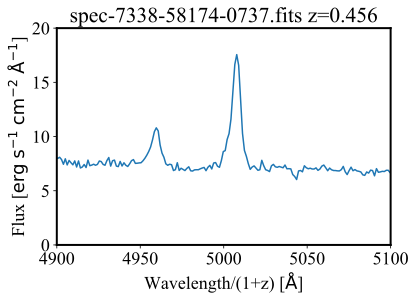

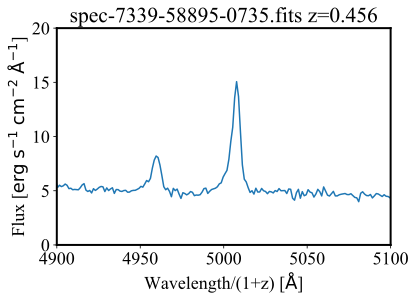

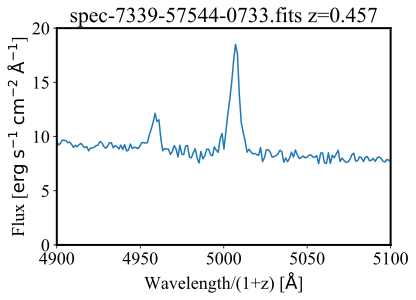

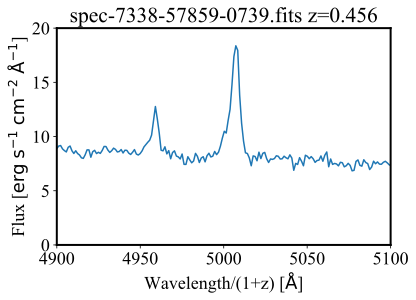

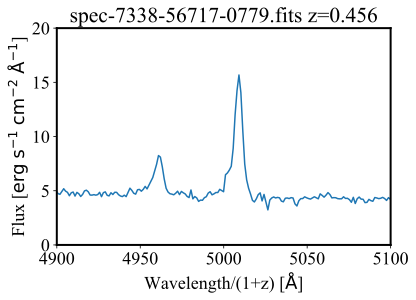

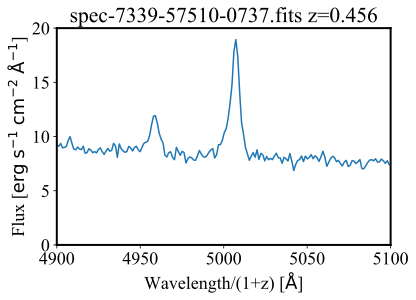

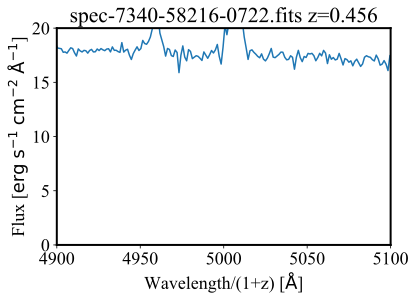

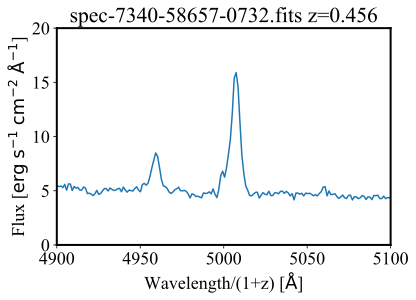

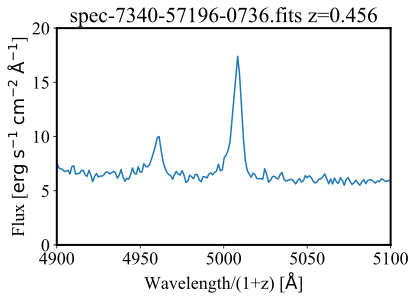

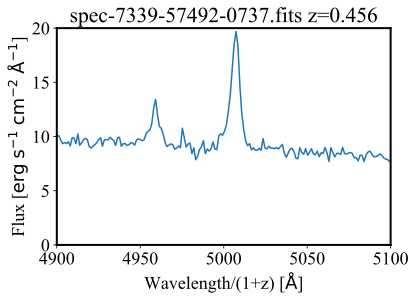

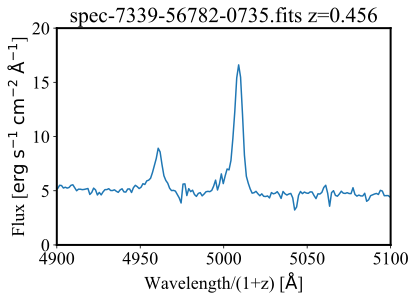

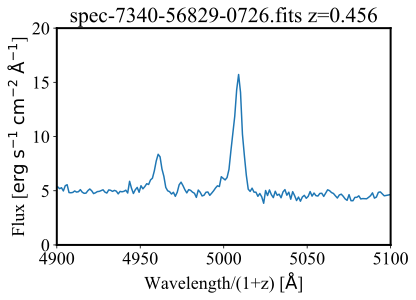

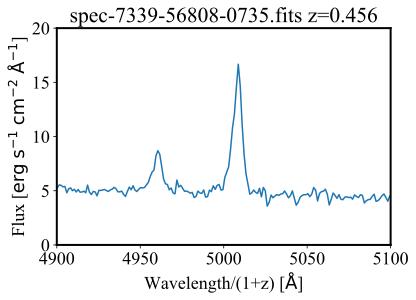

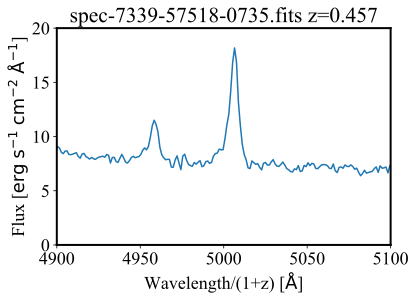

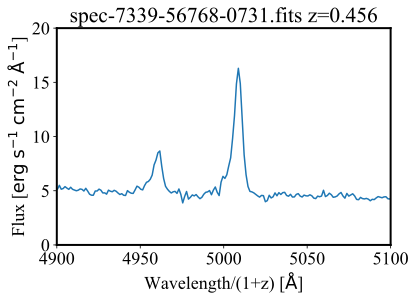

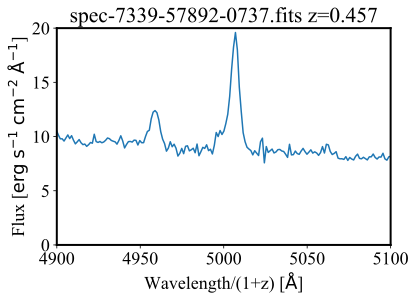

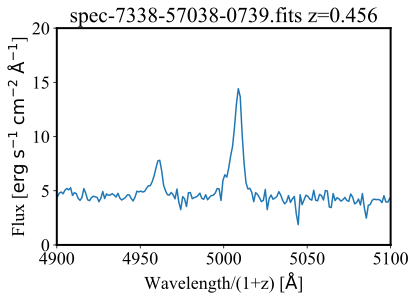

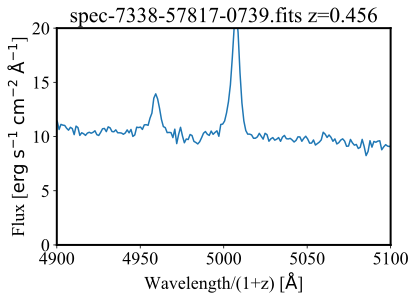

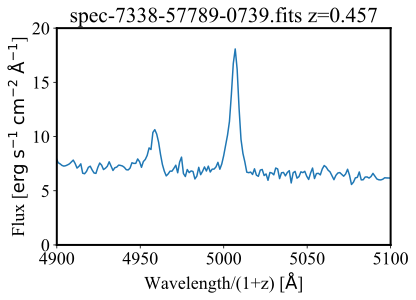

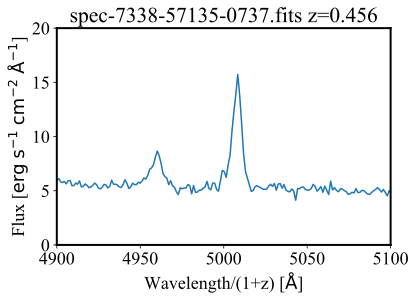

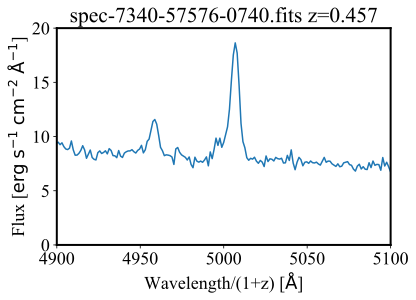

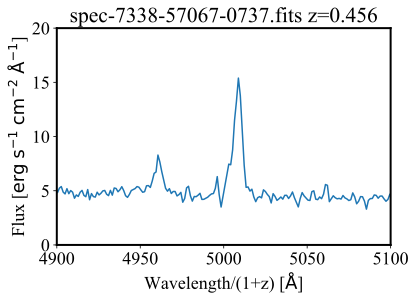

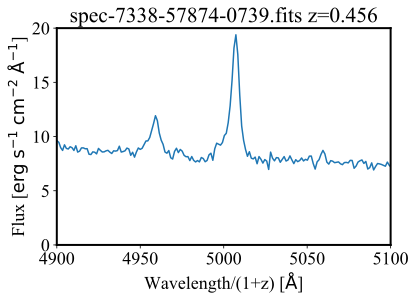

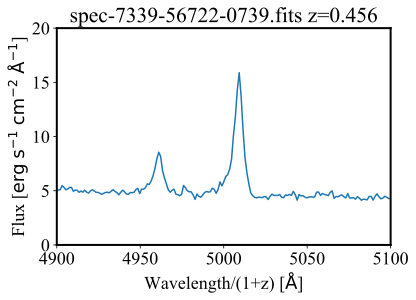

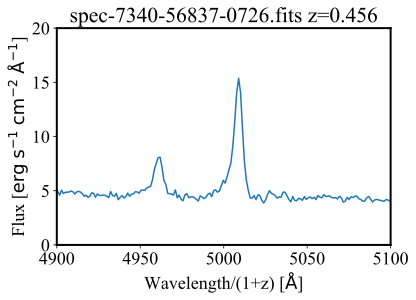

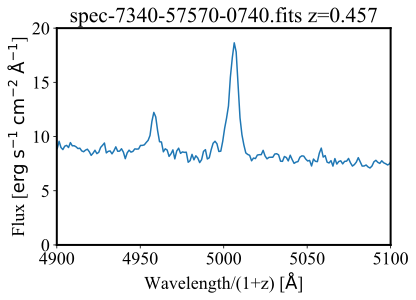

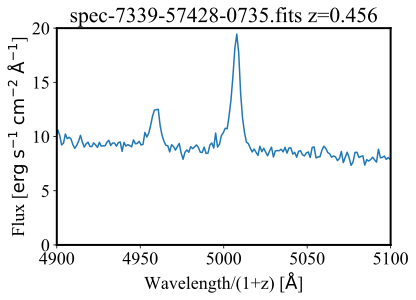

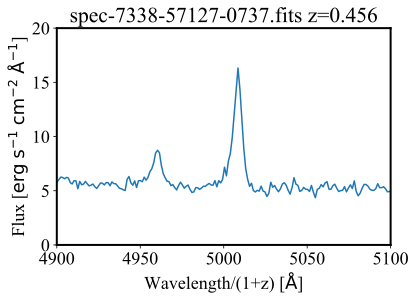

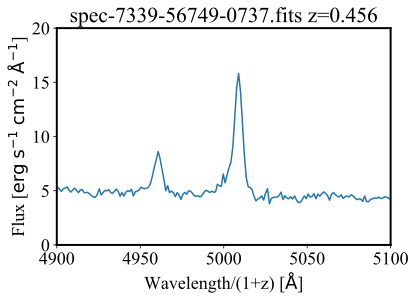

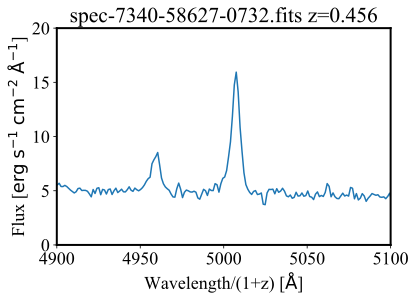

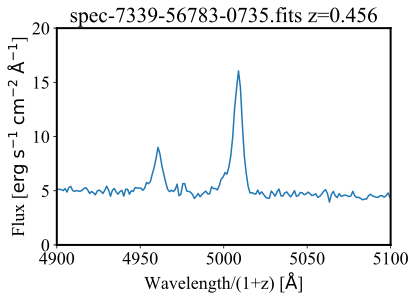

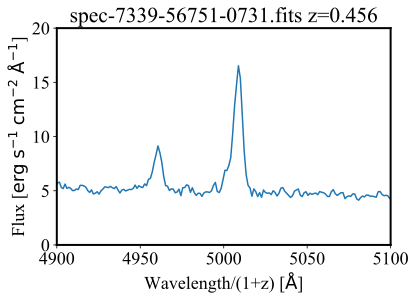

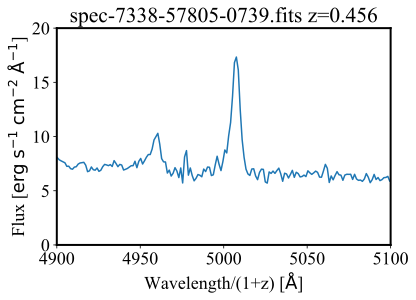

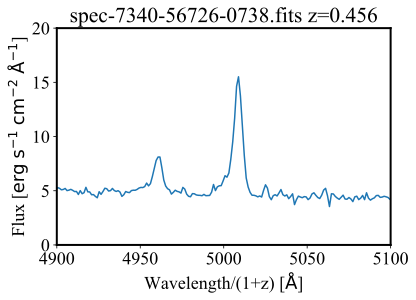

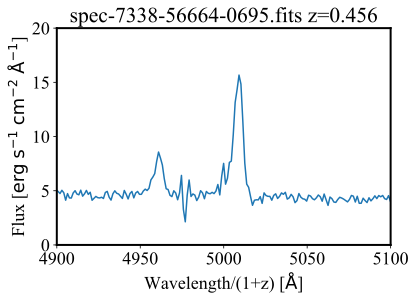

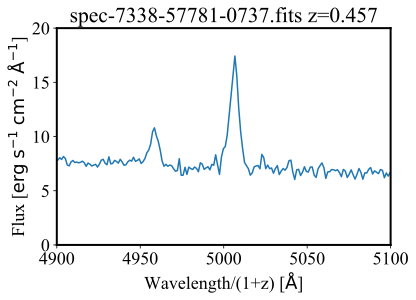

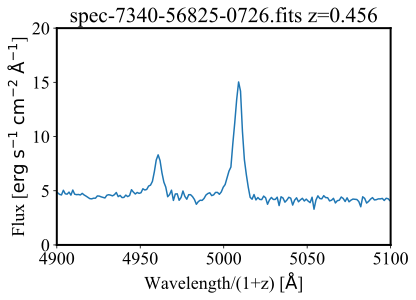

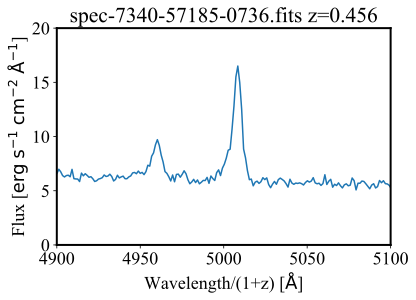

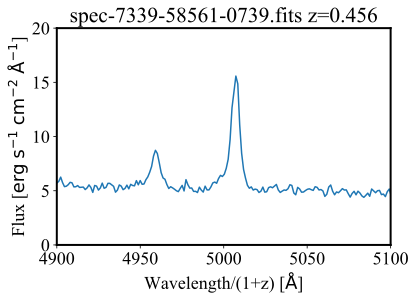

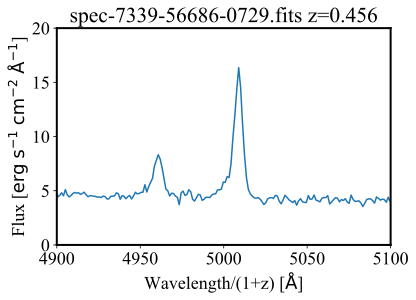

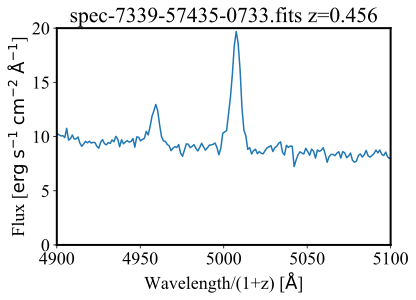

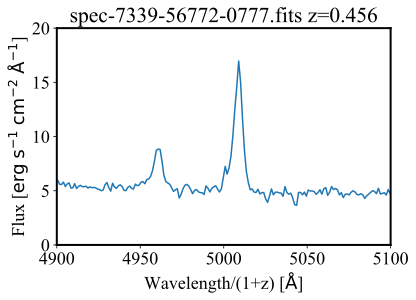

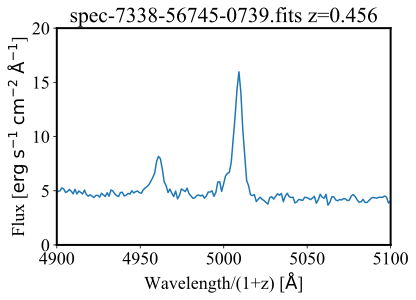

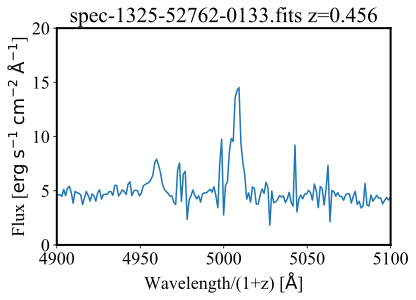

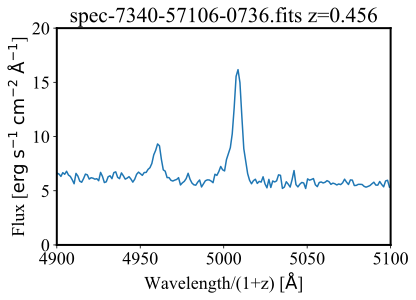

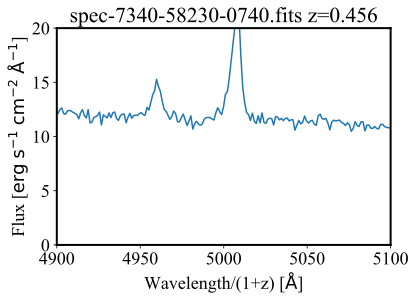

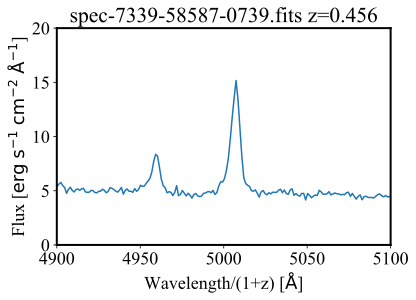

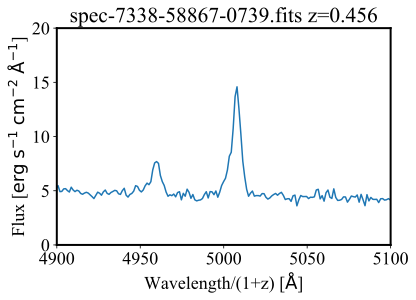

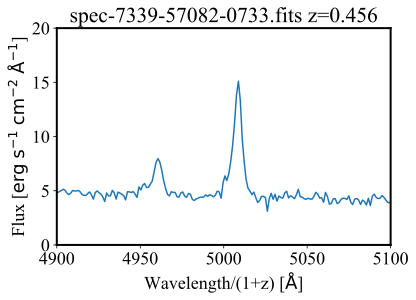

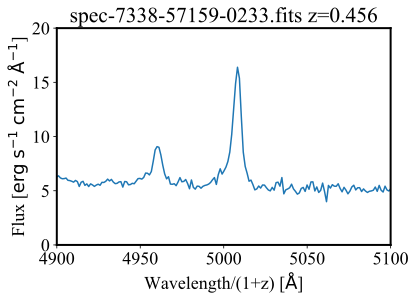

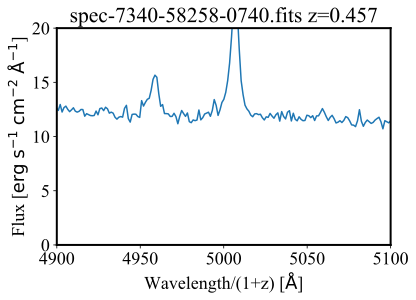

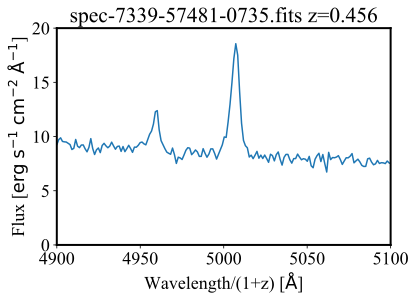

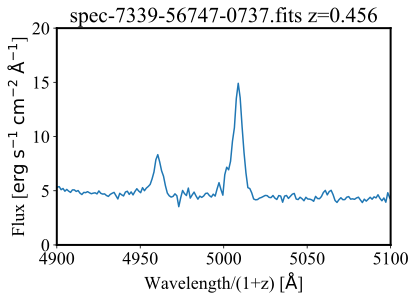

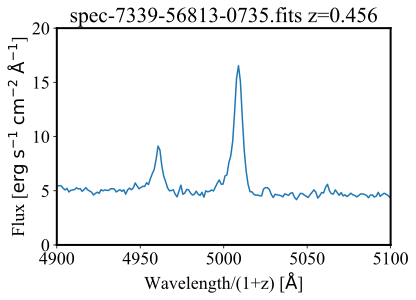

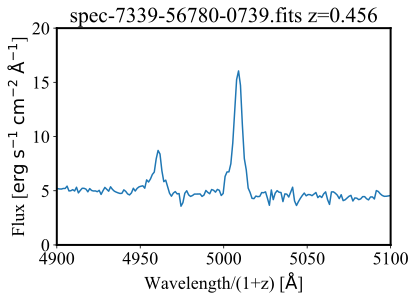

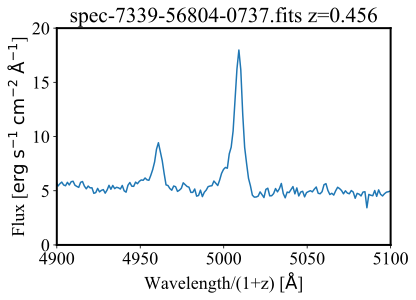

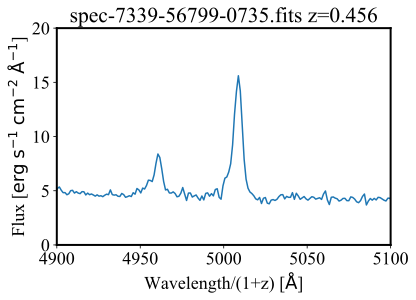

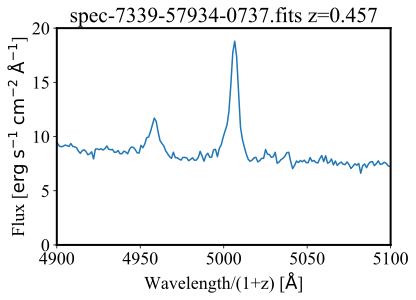

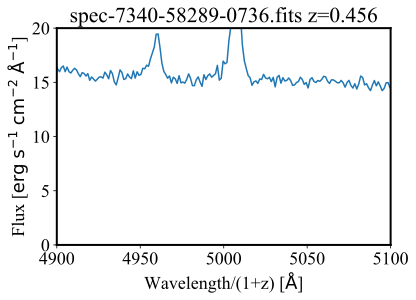

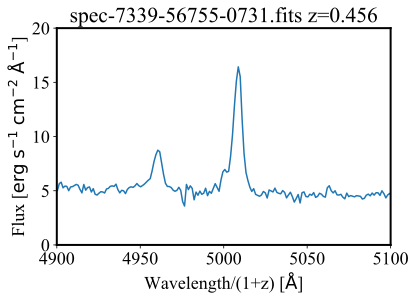

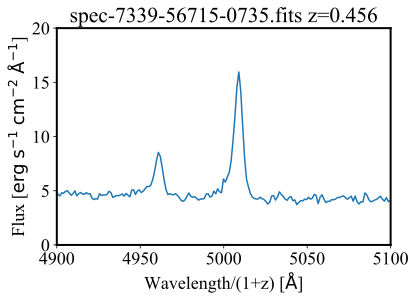

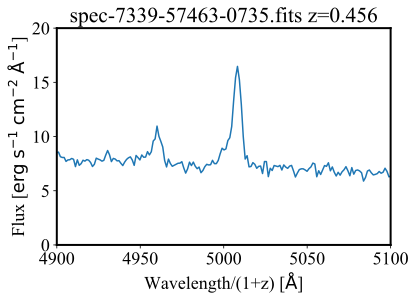

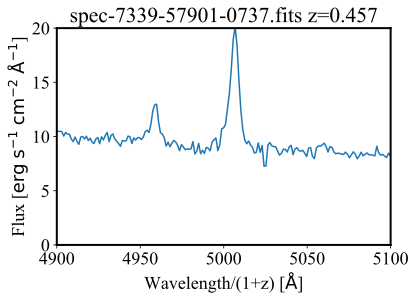

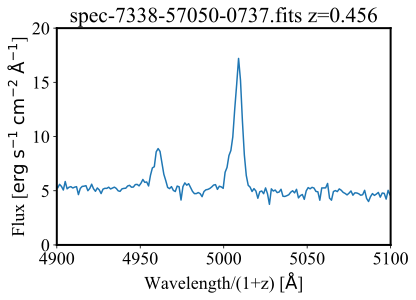

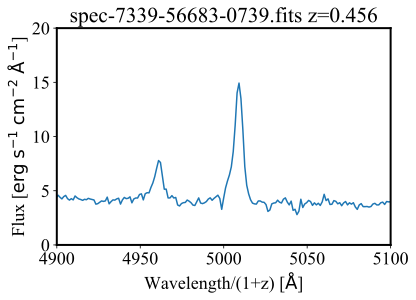

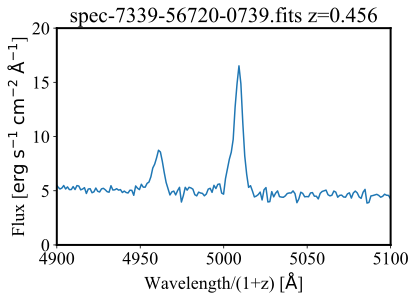

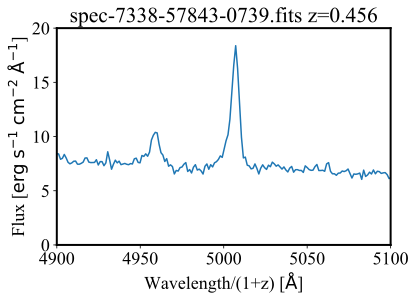

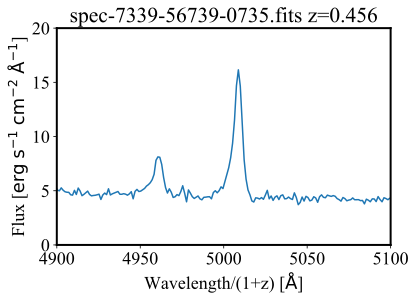

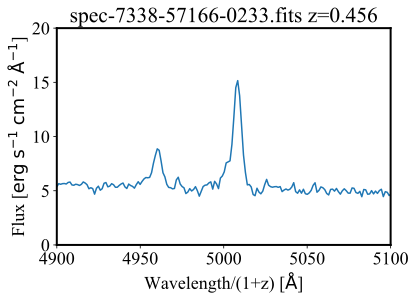

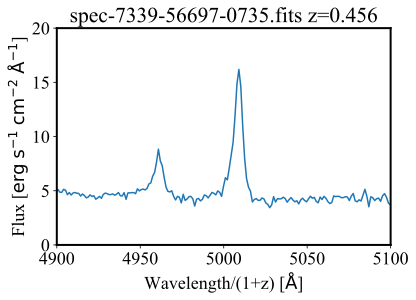

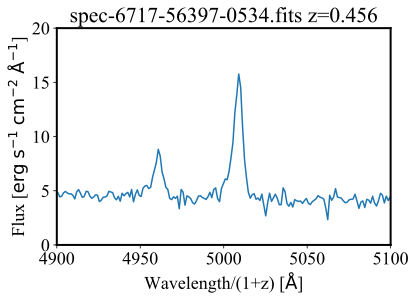

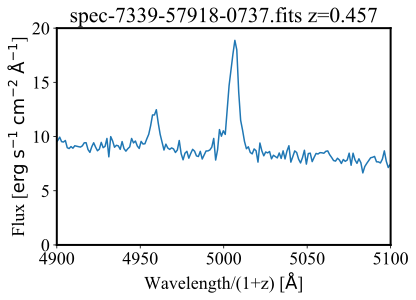

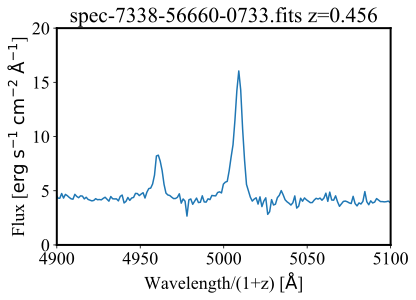

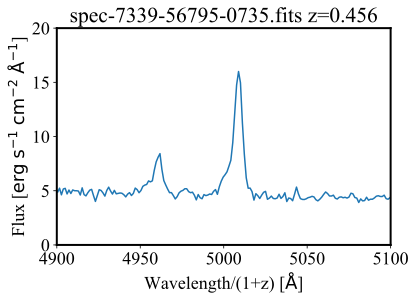

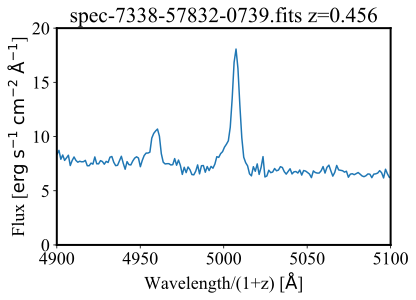

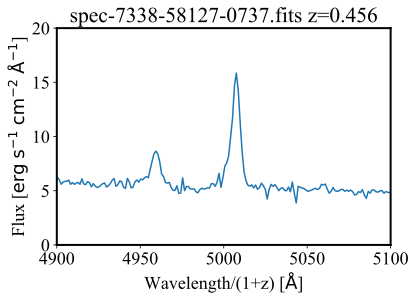

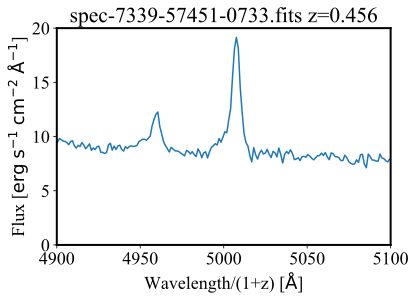

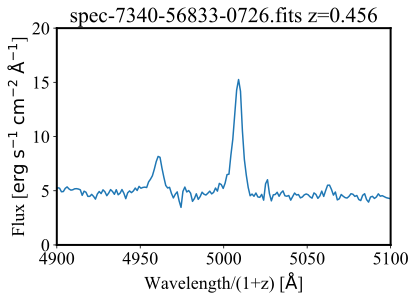

In [55]:
xlim=[4900,5100]
ylim=[0,20]
datadir='/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID17'
Spec_plot_dir(datadir,xlim,ylim)
create_gif_dir(datadir,xlim,ylim)

In [56]:
xlim=[1500,1700]
ylim=[0,20]
datadir='/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID32'
Spec_plot_dir(datadir,xlim,ylim)
create_gif_dir(datadir,xlim,ylim)

/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID32/1500_1700/56804_spec-7339-56804-0315_1500_1700.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID32/1500_1700/57832_spec-7338-57832-0331_1500_1700.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID32/1500_1700/57166_spec-7338-57166-0211_1500_1700.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID32/1500_1700/57570_spec-7340-57570-0317_1500_1700.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID32/1500_1700/57805_spec-7338-57805-0335_1500_1700.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID32/1500_1700/57518_spec-7339-57518-0313_1500_1700.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID32/1500_1700/58258_spec-7340-58258-0303_1500_1700.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID32/1500_1700/5

/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID32/1500_1700/56664_spec-7338-56664-0311_1500_1700.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID32/1500_1700/56813_spec-7339-56813-0315_1500_1700.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID32/1500_1700/56799_spec-7339-56799-0315_1500_1700.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID32/1500_1700/57106_spec-7340-57106-0317_1500_1700.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID32/1500_1700/56837_spec-7340-56837-0313_1500_1700.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID32/1500_1700/56720_spec-7339-56720-0353_1500_1700.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID32/1500_1700/58127_spec-7338-58127-0311_1500_1700.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID32/1500_1700/5

In [61]:
xlim=[1500,1700]#CIV
ylim=[0,15]
datadir='/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105'
Spec_plot_dir(datadir,xlim,ylim,logy=False)
create_gif_dir(datadir,xlim,ylim)

/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/1500_1700/58657_spec-7340-58657-0196_1500_1700.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/1500_1700/56448_spec-7027-56448-0977_1500_1700.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/1500_1700/56768_spec-7339-56768-0198_1500_1700.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/1500_1700/57038_spec-7338-57038-0190_1500_1700.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/1500_1700/56697_spec-7339-56697-0214_1500_1700.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/1500_1700/56795_spec-7339-56795-0188_1500_1700.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/1500_1700/57518_spec-7339-57518-0190_1500_1700.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/150

/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/1500_1700/57082_spec-7339-57082-0190_1500_1700.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/1500_1700/56782_spec-7339-56782-0188_1500_1700.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/1500_1700/58127_spec-7338-58127-0192_1500_1700.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/1500_1700/56808_spec-7339-56808-0188_1500_1700.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/1500_1700/57510_spec-7339-57510-0186_1500_1700.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/1500_1700/56833_spec-7340-56833-0194_1500_1700.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/1500_1700/57463_spec-7339-57463-0186_1500_1700.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/150

In [62]:
xlim=[1800,2000]#CIII
ylim=[0,15]
datadir='/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105'
Spec_plot_dir(datadir,xlim,ylim,logy=False)
create_gif_dir(datadir,xlim,ylim)

/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/1800_2000/58657_spec-7340-58657-0196_1800_2000.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/1800_2000/56448_spec-7027-56448-0977_1800_2000.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/1800_2000/56768_spec-7339-56768-0198_1800_2000.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/1800_2000/57038_spec-7338-57038-0190_1800_2000.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/1800_2000/56697_spec-7339-56697-0214_1800_2000.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/1800_2000/56795_spec-7339-56795-0188_1800_2000.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/1800_2000/57518_spec-7339-57518-0190_1800_2000.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/180

/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/1800_2000/57082_spec-7339-57082-0190_1800_2000.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/1800_2000/56782_spec-7339-56782-0188_1800_2000.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/1800_2000/58127_spec-7338-58127-0192_1800_2000.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/1800_2000/56808_spec-7339-56808-0188_1800_2000.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/1800_2000/57510_spec-7339-57510-0186_1800_2000.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/1800_2000/56833_spec-7340-56833-0194_1800_2000.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/1800_2000/57463_spec-7339-57463-0186_1800_2000.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/180

In [63]:
xlim=[2700,2900]#MII
ylim=[0,15]
datadir='/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105'
Spec_plot_dir(datadir,xlim,ylim,logy=False)
create_gif_dir(datadir,xlim,ylim)

/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/2700_2900/58657_spec-7340-58657-0196_2700_2900.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/2700_2900/56448_spec-7027-56448-0977_2700_2900.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/2700_2900/56768_spec-7339-56768-0198_2700_2900.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/2700_2900/57038_spec-7338-57038-0190_2700_2900.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/2700_2900/56697_spec-7339-56697-0214_2700_2900.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/2700_2900/56795_spec-7339-56795-0188_2700_2900.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/2700_2900/57518_spec-7339-57518-0190_2700_2900.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/270

/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/2700_2900/57082_spec-7339-57082-0190_2700_2900.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/2700_2900/56782_spec-7339-56782-0188_2700_2900.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/2700_2900/58127_spec-7338-58127-0192_2700_2900.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/2700_2900/56808_spec-7339-56808-0188_2700_2900.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/2700_2900/57510_spec-7339-57510-0186_2700_2900.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/2700_2900/56833_spec-7340-56833-0194_2700_2900.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/2700_2900/57463_spec-7339-57463-0186_2700_2900.png
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/270

In [64]:
SDSSRM_17sources

RMID        RA      DEC     z  logMbh  mag(u)
0     12  213.4822  53.2006  1.58    8.30   22.35
1     17  213.3511  53.0908  0.46    8.40   21.15
2     32  213.3064  52.9306  1.71    7.60   20.53
3    105  214.5063  52.8669  1.16    9.05   20.17
4    112  212.8857  52.8532  1.40    9.23   19.96
5    143  213.6296  53.7088  1.23    8.77   20.87
6    160  212.6719  53.3136  0.36    8.20   19.73
7    194  213.1297  52.4422  1.56    8.98   21.90
8    303  214.6259  52.3701  0.82    8.30   21.14
9    309  214.8457  53.6932  1.32    8.76   21.25
10   346  214.6820  53.8607  1.59    8.68   21.78
11   434  212.2986  52.3973  1.55    8.69   20.89
12   559  215.7504  53.2819  1.22    8.43   21.35
13   597  215.2584  52.1978  1.20    8.46   21.53
14   714  215.9572  52.6510  0.92    8.90   20.40
15   768  212.3154  53.4561  0.26    8.70   20.43
16   839  213.4954  54.4517  0.98    9.10   21.33

In [104]:
def Spec_plot_dir_check(datadir,z,logy=False):
      
    datadir_fix= datadir.split('/')[-1]
    filespath=os.listdir(datadir)
    files=[]
    for i in filespath:
        if i.endswith('.fits'):
            files.append(i)
    
    len_files=len(files)
    

    
    for index,i in enumerate(files):
        path_spec=os.path.join(datadir,i)
        sdss_sp= SdssSpec(path_spec)
        mjd=sdss_sp.mjd
        sdss_z=sdss_sp.redshift
        
        if abs(z-sdss_z)>0.05:
            print(datadir,i,z,sdss_z)
      
        


In [105]:
for rmid,z in zip(SDSSRM_17sources['RMID'],SDSSRM_17sources['z']):
    #print(rmid,',',z, 3566/(1+z), 10354/(1+z))
    
    
    datadir='/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID%d'%rmid
    
    Spec_plot_dir_check(datadir,z)

/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID839 spec-7339-57934-0702.fits 0.98 3.508608
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID839 spec-7339-56720-0744.fits 0.98 1.9258239
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID839 spec-7339-58587-0704.fits 0.98 1.9150548
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID839 spec-7340-57570-0709.fits 0.98 3.4868944


# gif all

In [18]:
LINEs= [1549.0, 1908.73, 2798.75,4862.68,6564.61]
regions=[[1450,1650],[1800,2000],[2700,2900],[4750,4950],[6450,6650]]

12 , 1.58 1382.1705426356589 4013.178294573643
17 , 0.46 2442.4657534246576 7091.780821917809
32 , 1.71 1315.8671586715868 3820.6642066420663
105 , 1.16 1650.9259259259259 4793.518518518518
112 , 1.4 1485.8333333333335 4314.166666666667
143 , 1.23 1599.1031390134528 4643.04932735426
160 , 0.36 2622.058823529412 7613.235294117648
194 , 1.56 1392.96875 4044.53125
303 , 0.82 1959.3406593406596 5689.01098901099
309 , 1.32 1537.0689655172412 4462.931034482758
346 , 1.59 1376.833976833977 3997.6833976833977
434 , 1.55 1398.4313725490197 4060.392156862745
559 , 1.22 1606.3063063063064 4663.9639639639645
597 , 1.2 1620.9090909090908 4706.363636363636
714 , 0.92 1857.2916666666667 5392.708333333334
768 , 0.26 2830.15873015873 8217.460317460318
839 , 0.98 1801.010101010101 5229.292929292929
[1800, 2000] /Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID839
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID839/RMID839_1800_2000.gif
[2700, 2900] 

/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_11264/3579438133.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure()


/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID839/RMID839_2700_2900.gif
[4750, 4950] /Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID839
/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID839/RMID839_4750_4950.gif


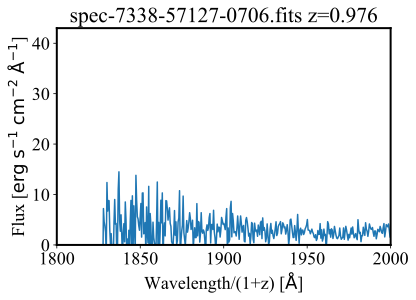

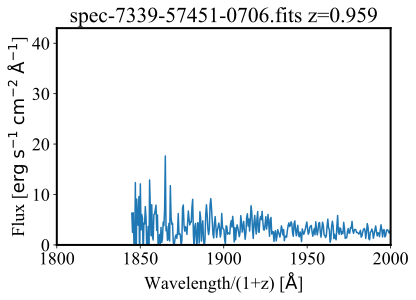

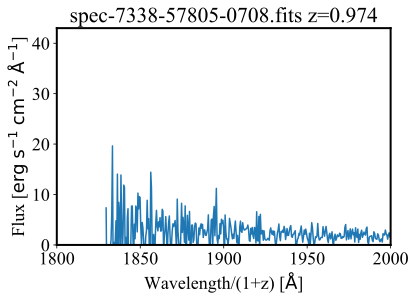

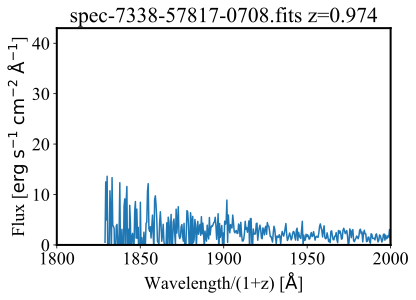

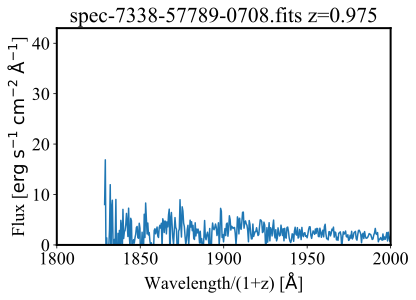

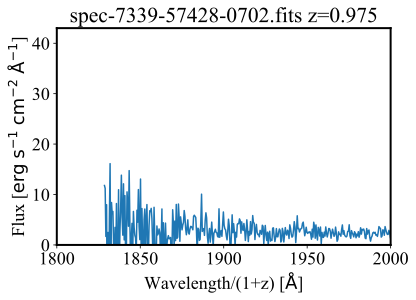

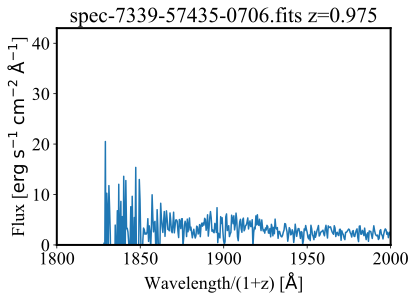

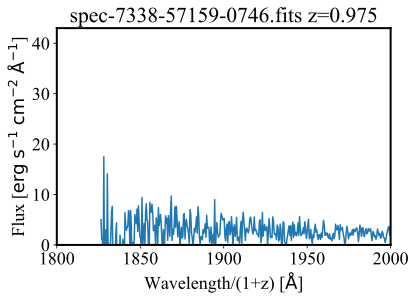

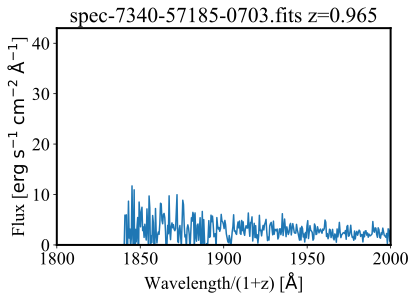

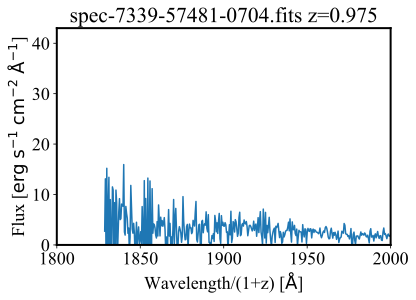

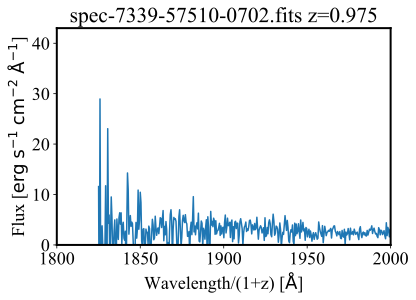

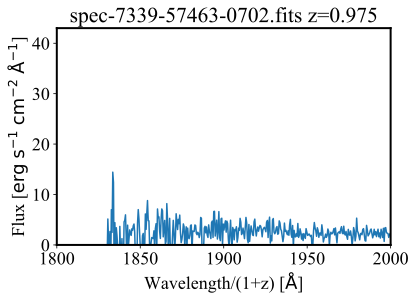

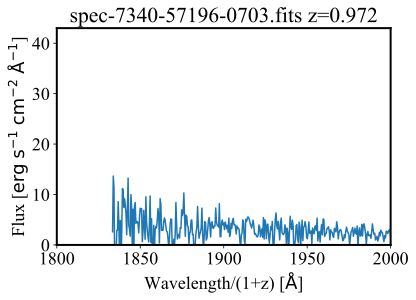

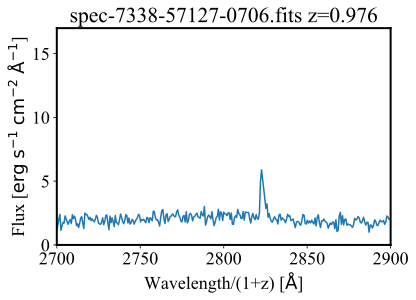

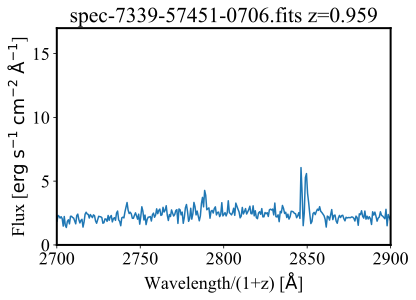

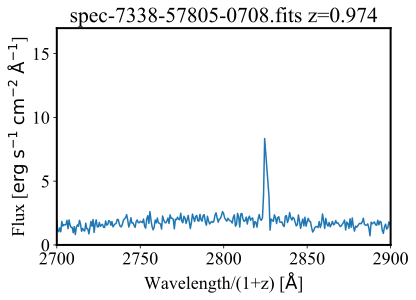

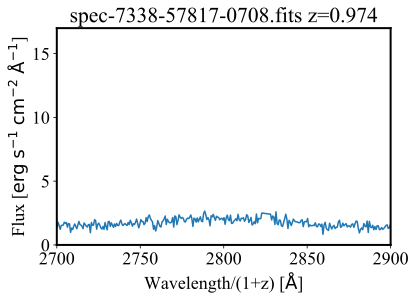

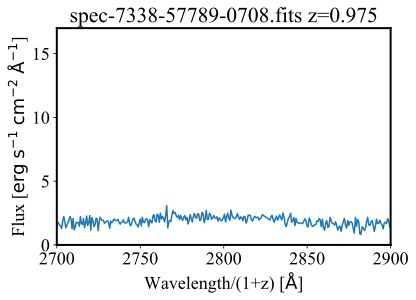

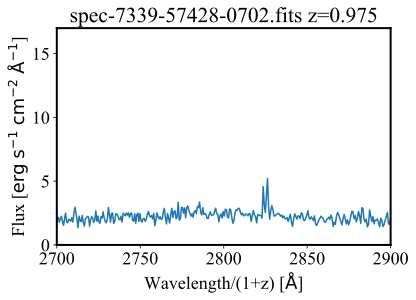

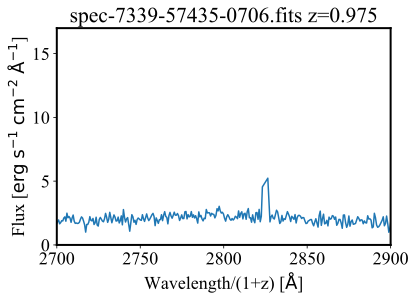

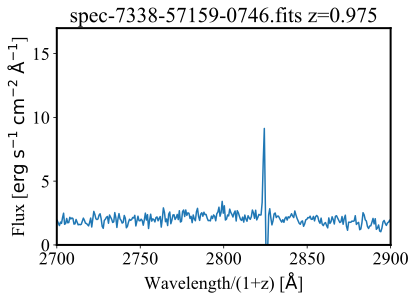

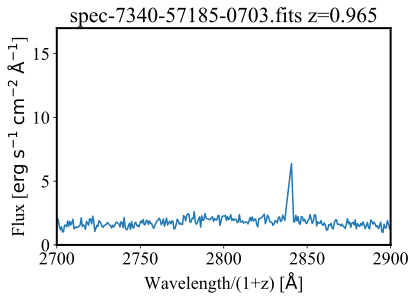

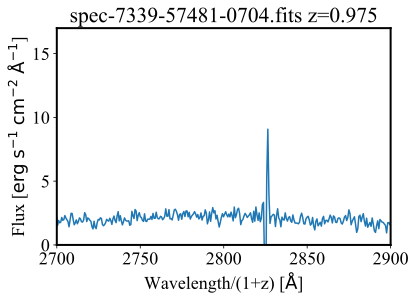

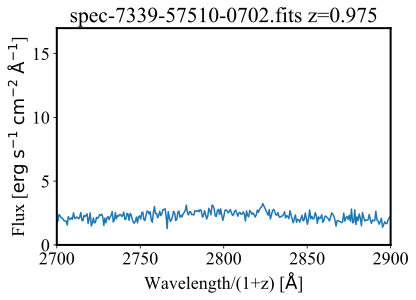

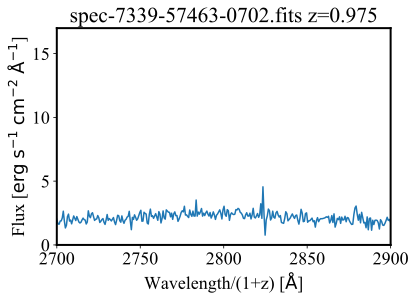

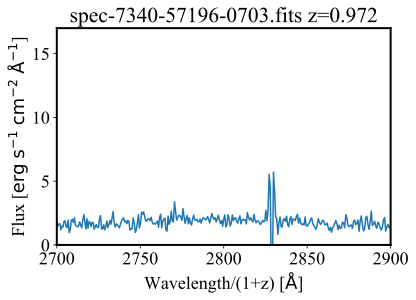

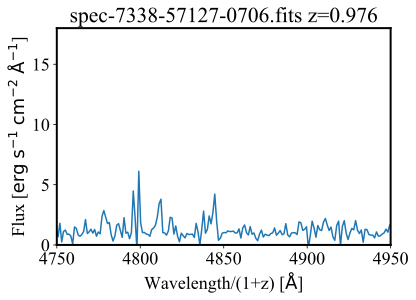

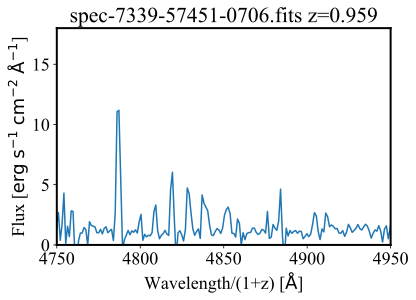

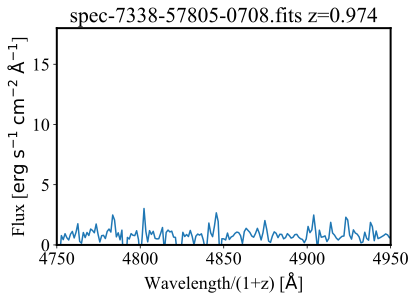

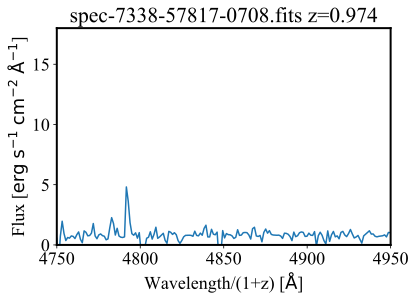

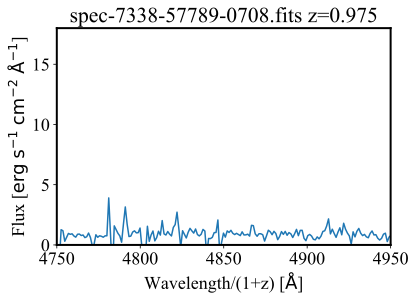

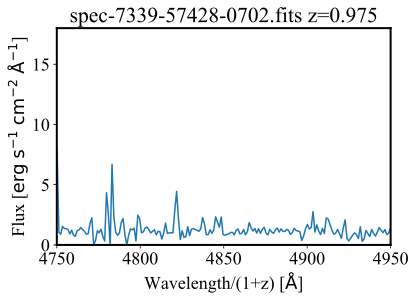

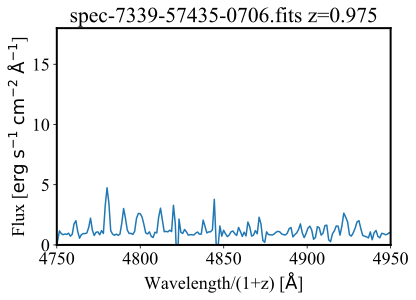

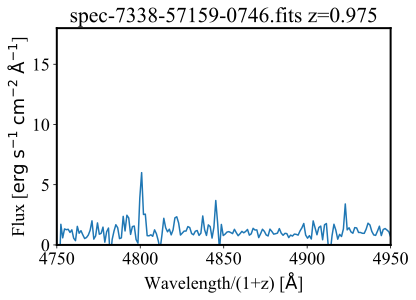

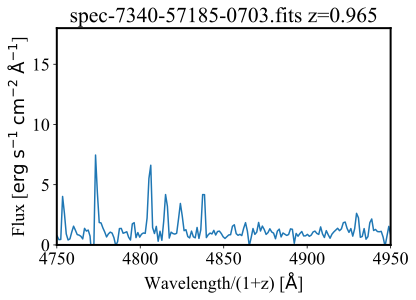

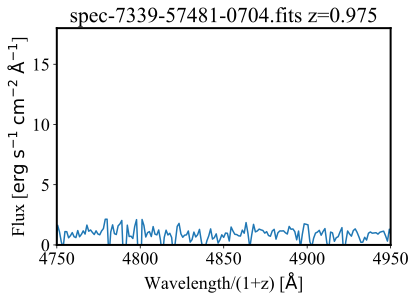

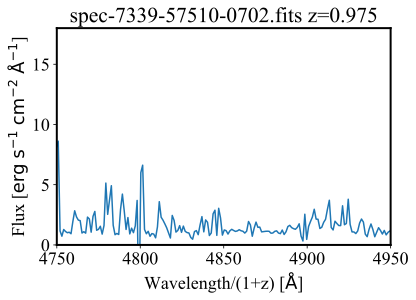

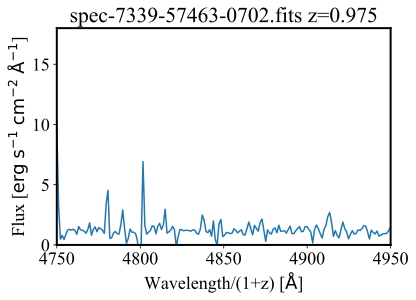

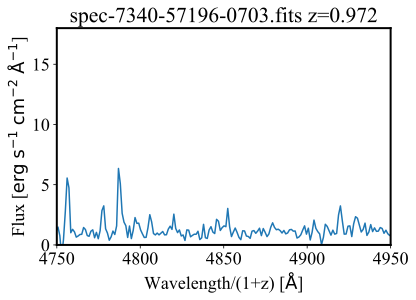

In [19]:
for rmid,z in zip(SDSSRM_17sources['RMID'],SDSSRM_17sources['z']):
    print(rmid,',',z, 3566/(1+z), 10354/(1+z))
    
    for line,region in zip(LINEs,regions):
        if line < 10354/(1+z) and line > 3566/(1+z):
            xlim=region
            if rmid==839:
                datadir='/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID%d'%rmid
                print(xlim,datadir)
                Spec_plot_dir(datadir,xlim,logy=False)
                create_gif_dir(datadir,xlim)            
    
    

# def read_spec

In [ ]:
def read_spec(filename):
    '''Read a UVES spectrum from the ESO pipeline

    Parameters
    ----------
    filename : string
       name of the fits file with the data

    Returns
    -------
    wavelength : np.ndarray
        wavelength (in Ang)
    flux : np.ndarray
        flux (in erg/s/cm**2)
    date_obs : string
        time of observation
    '''
    sp = fits.open(filename)
    header = sp[0].header

    wcs = WCS(header)
    #make index array
    index = np.arange(header['NAXIS1'])

    wavelength = wcs.wcs_pix2world(index[:,np.newaxis], 0)
    wavelength = wavelength.flatten()
    flux = sp[0].data

    date_obs = header['Date-OBS']
    return wavelength, flux, date_obs

In [ ]:
filelist=

In [ ]:
for i, fname in enumerate(filelist):
    w, f, date_obs = read_spec(fname)
    print(w[0],w[1],w[1]-w[0],w[-1],len(w))

In [ ]:
#len(wavelength)
len_wavelength=888
fluxs = np.zeros((len(filelist), len_wavelength))
# date comes as string with 23 characters (dtype = 'S23')
dates = np.zeros((len(filelist)), dtype = 'S23')

for i, fname in enumerate(filelist):
    w, f, date_obs = read_spec(fname)
    
    fluxs[i,:] = f[:len_wavelength]
    dates[i] = date_obs

## average spectrum

## rms spectrum

# lines

In [ ]:
(6564.61,'Ha',6400.,6800.,'Ha_br',3,5e-3,0.004,0.017,0.015,0,0,0,0.05),\
                        (6564.61,'Ha',6400.,6800.,'Ha_na',1,1e-3,2.3e-4,0.0017,0.01,1,1,0,0.002),\
                        (6549.85,'Ha',6400.,6800.,'NII6549',1,1e-3,2.3e-4,0.0017,5e-3,1,1,1,0.001),\
                        (6585.28,'Ha',6400.,6800.,'NII6585',1,1e-3,2.3e-4,0.0017,5e-3,1,1,1,0.003),\
                        (6718.29,'Ha',6400.,6800.,'SII6718',1,1e-3,2.3e-4,0.0017,5e-3,1,1,2,0.001),\
                        (6732.67,'Ha',6400.,6800.,'SII6732',1,1e-3,2.3e-4,0.0017,5e-3,1,1,2,0.001),\
                        
                        (4862.68,'Hb',4640.,5100.,'Hb_br',3,5e-3,0.004,0.022,0.01,0,0,0,0.01),\
                        (4862.68,'Hb',4640.,5100.,'Hb_na',1,1e-3,2.3e-4,0.0017,0.01,1,1,0,0.002),\
                        (4960.30,'Hb',4640.,5100.,'OIII4959',1,1e-3,2.3e-4,0.0017,0.01,1,1,0,0.002),\
                        (5008.24,'Hb',4640.,5100.,'OIII5007',1,1e-3,2.3e-4,0.0017,0.01,1,1,0,0.004),\
                        (4955.30,'Hb',4640.,5100.,'OIII4959w',1,1e-3,2.3e-4,0.0017,0.01,2,2,0,0.001),\
                        (4995.24,'Hb',4640.,5100.,'OIII5007w',1,1e-3,2.3e-4,0.0017,0.01,2,2,0,0.002),\
                        # (4687.02,'Hb',4640.,5100.,'HeII4687_br',1,5e-3,0.004,0.05,0.005,0,0,0,0.001),\
                        # (4687.02,'Hb',4640.,5100.,'HeII4687_na',1,1e-3,2.3e-4,0.0017,0.005,1,1,0,0.001),\
                        # (4341.68,'Hg',4250.,4440.,'Hg_br',1,5e-3,0.004,0.025,0.0017,0,0,0,0.05),\
                        # (4341.68,'Hg',4250.,4440.,'Hg_na',1,1e-3,2.3e-4,0.0017,5e-3,1,1,2,0.001),\
                        # (4364.44,'Hg',4250.,4440.,'OIII4364',1,1e-3,2.3e-4,0.0017,5e-3,1,1,2,0.001),\
                        #( 3934.78,'CaII',3900.,3960.,'CaII3934',2,1e-3,3.333e-4,0.0017,0.01,99,0,0,-0.001),\
                        
                        (3728.48,'OII',3650.,3800.,'OII3728',1,1e-3,3.333e-4,0.0017,0.01,1,1,0,0.001),\
                        
                        #(3426.84,'NeV',3380.,3480.,'NeV3426',1,1e-3,3.333e-4,0.0017,0.01,0,0,0,0.001),\
                        #(3426.84,'NeV',3380.,3480.,'NeV3426_br',1,5e-3,0.0025,0.02,0.01,0,0,0,0.001),\
                        
                        (2798.75,'MgII',2700.,2900.,'MgII_br',2,5e-3,0.004,0.015,0.0017,0,0,0,0.05),\
                        (2798.75,'MgII',2700.,2900.,'MgII_na',1,1e-3,2.3e-4,0.0017,0.01,0,0,0,0.002),\
                        
                        
                        (1908.73,'CIII',1700.,1970.,'CIII_br',2,5e-3,0.004,0.015,0.015,99,0,0,0.01),\
                        #(1908.73,'CIII',1700.,1970.,'CIII_na',1,1e-3,5e-4,0.0017,0.01,1,1,0,0.002),\
                        #(1892.03,'CIII',1700.,1970.,'SiIII1892',1,2e-3,0.001,0.015,0.003,1,1,0,0.005),\
                        #(1857.40,'CIII',1700.,1970.,'AlIII1857',1,2e-3,0.001,0.015,0.003,1,1,0,0.005),\
                        #(1816.98,'CIII',1700.,1970.,'SiII1816',1,2e-3,0.001,0.015,0.01,1,1,0,0.0002),\
                        #(1786.7,'CIII',1700.,1970.,'FeII1787',1,2e-3,0.001,0.015,0.01,1,1,0,0.0002),\
                        #(1750.26,'CIII',1700.,1970.,'NIII1750',1,2e-3,0.001,0.015,0.01,1,1,0,0.001),\
                        #(1718.55,'CIII',1700.,1900.,'NIV1718',1,2e-3,0.001,0.015,0.01,1,1,0,0.001),\
                        
                        (1549.06,'CIV',1500.,1700.,'CIV_br',3,5e-3,0.004,0.015,0.015,0,0,0,0.05),\

## combine plot

In [ ]:
for rmid,ra,dec in zip(SDSSRM_17sources['RMID'],SDSSRM_17sources['RA'],SDSSRM_17sources['DEC']):
    #print(rmid,ra,dec)
    pd_spids=pd.read_csv('./SDSSRM/%s.csv'%rmid) 
    pd_spids_specObjID= pd_spids['specobjid']
    pd_spids_mjd=pd_spids['mjd']
    pd_spids_plate=pd_spids['plate']
    pd_spids_fiberID=pd_spids['fiberID']
    
    fig=plt.figure(figsize=(8,12))
    fig.subplots_adjust(hspace=0., wspace = 0.0)
    ax = fig.add_subplot(1,1,1)

    
    for mjd,plate,fiberID in zip(pd_spids_mjd,pd_spids_plate,pd_spids_fiberID):
        print(mjd,plate,fiberID)
        if fiberID <10:
            fiberID_str='000%d'%fiberID
        elif fiberID <100:
            fiberID_str='00%d'%fiberID
        elif fiberID <1000:
            fiberID_str='0%d'%fiberID               
        
        path_spec='%s/spec-%d-%d-%s.fits'%(spec_dir,plate,mjd,fiberID_str)
        path_spec_name=path_spec.split('/')[-1][:-5]
        
        if os.path.exists(path_spec):
            print(path_spec)
            
            sdss_sp= SdssSpec(path_spec)
            ax=sdss_sp.plot_restframe_multiepoch(ax)            
    
    ax.set_xlabel(r'Wavelength/(1+z) [$\mathrm{\AA}$]')
  
    ax.set_ylabel(r'Flux [$\mathrm{10^{-17} erg\;s^{-1}\;cm^{-2}\;\AA^{-1}}$]')
    
    ax.semilogy()
    
    plt.title('RMID_%d '%rmid) 
        
    save_lc_img_path=os.path.join('/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/','%s.png'%rmid) 
    plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
            

# def combine_plot_dir()

In [ ]:
os.listdir(spec_dir)

In [ ]:
def combine_plot_dir(datadir):
    datadir_fix= datadir.split('/')[-1]
    filespath=os.listdir(datadir)
    files=[]
    for i in filespath:
        if i.endswith('.fits'):
            files.append(i)
    
    len_files=len(files)
    
    fig=plt.figure(figsize=(8,20))
    fig.subplots_adjust(hspace=0., wspace = 0.0)
    ax = fig.add_subplot(1,1,1)
        
    for index,i in enumerate(files):
        path_spec=os.path.join(datadir,i)
        sdss_sp= SdssSpec(path_spec)
        ax=sdss_sp.plot_restframe_multiepoch(ax,index/2)   
        
    ax.set_xlabel(r'Wavelength/(1+z) [$\mathrm{\AA}$]')  
    ax.set_ylabel(r'Flux [$\mathrm{10^{-17} erg\;s^{-1}\;cm^{-2}\;\AA^{-1}}$]') 
    set_ax_legend(ax,bbox_to_anchor=(0.99,0.9))
    return fig,ax

In [ ]:
pwd

In [ ]:
datadir='/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID12/'
fix,ax=combine_plot_dir(datadir)

# glob

In [ ]:
import glob
all_spec_fis_filepath=glob.glob('%s/*.fits'%spec_dir)

In [ ]:
all_spec_fis_filepath

In [ ]:
import shutil
from shutil import copyfile

for i in all_spec_fis_filepath:
    sdss_sp= SdssSpec(i)
    ra_sdss_sp=sdss_sp.ra    
    dec_sdss_sp=sdss_sp.dec
    
    for rmid,ra,dec in zip(SDSSRM_17sources['RMID'],SDSSRM_17sources['RA'],SDSSRM_17sources['DEC']):    
        if abs(ra_sdss_sp-ra)<0.01 and abs(dec_sdss_sp-dec)<0.01:
            sys_cmd='cp %s %sRMID%d/'%(i,SDSSRM_dir,rmid)
            print(sys_cmd)
            #os.system(sys_cmd)
            #sys_cmd='%s %sRMID%d/'%(i,SDSSRM_dir,rmid)
            #print(sys_cmd)
            #shutil.copyfile(i, '%sRMID%d/'%(SDSSRM_dir,rmid))
            

In [ ]:
pwd

# class SdssSpec()

In [13]:
class SdssSpec():
    '''
    A simple class to load SDSS spectrum.
    
    '''
    def __init__(self, fname, redshift=None, scale_flux=False):
        """
        Initialize SdssSpec object from a SDSS 1D spectrum file.
        Parameters:
        ----------
            fname : str
                name of the fits file.
            redshift : float
                redshift of the spectrum. Should be provided if not recorded in the fits header.
            scale_flux : bool (`True` or `False`)
                When `True`, the flux and err are multiplied by 1e-17; `False` by default.
        Example:
        ----------
        sp = SdssSpec("spec-plateid-mjd-fiberid.fits", redshift=0.01)
        """
        hdu = fits.open(fname)
        basename = os.path.basename(fname)
        self.basename = basename
        hdr = hdu[0].header
        self.hdr = hdr
        self.ra=hdr['plug_ra']          # RA 
        self.dec=hdr['plug_dec']        # DEC
        self.plateid = hdr['plateid']   # SDSS plate ID
        self.mjd = hdr['mjd']           # SDSS MJD
        self.fiberid = hdr['fiberid']   # SDSS fiber ID
        self.scale_flux = scale_flux
        if redshift is None:
            try: 
                redshift = hdu[2].data['z']
            except: 
                raise ValueError('Redshift not provided. '+ 
                                 'Please check the input parameters carefully.')
        self.redshift = redshift[0]
        data = hdu[1].data
        hdu.close()     
        wave = 10**data['loglam']
        flux = data['flux']
        ivar = pd.Series(data['ivar'])
        ivar.replace(0, np.nan, inplace=True)
        ivar_safe = ivar.interpolate()
        err = 1./np.sqrt(ivar_safe.values)
        if scale_flux == True:
            flux *= 1e-17
            err *= 1e-17
        self.wave = wave
        self.flux = flux
        self.err = err    
        
        
    def plot(self):
        plt.figure()
        plt.plot(self.wave, self.flux)
        plt.xlabel(r'Wavelength [$\mathrm{\AA}$]')
        if self.scale_flux == True:
            plt.ylabel(r'Flux [$\mathrm{erg\;s^{-1}\;cm^{-2}\;\AA^{-1}}$]')
        else:
            plt.ylabel(r'Flux [$\mathrm{10^{-17} erg\;s^{-1}\;cm^{-2}\;\AA^{-1}}$]')
        plt.title(self.basename)
        
    def plot_restframe(self):
        fig=plt.figure()
        ax = fig.add_subplot(1,1,1)        
        ax.plot(self.wave/(1+self.redshift), self.flux)
        plt.xlabel(r'Wavelength/(1+z) [$\mathrm{\AA}$]')
        
        if self.scale_flux == False:
            plt.ylabel(r'Flux [$\mathrm{erg\;s^{-1}\;cm^{-2}\;\AA^{-1}}$]')
        else:
            plt.ylabel(r'Flux [$\mathrm{10^{-17} erg\;s^{-1}\;cm^{-2}\;\AA^{-1}}$]')
        
        plt.title(self.basename+' z=%.3f'%self.redshift)
        
        return fig,ax
    
    def plot_restframe_multiepoch(self,ax,shift):
        
        ax.plot(self.wave/(1+self.redshift), self.flux+shift, 
                marker='.',
                markersize=1, label='+ %.1f'%shift)
    
        return ax      
    


## test

In [66]:
path_spec='/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/RMID105/spec-6717-56397-0356.fits'
sp=SdssSpec(path_spec)

In [68]:
sp.wave

array([ 3566.1538,  3566.9744,  3567.7969, ..., 10349.043 , 10351.419 ,
       10353.806 ], dtype=float32)

In [79]:
xlim=[1500,1700]
sdss_sp0= SdssSpec(path_spec)
mjd0=sdss_sp0.mjd
wave0=sdss_sp0.wave
flux0=sdss_sp0.flux        
z0=sdss_sp0.redshift
wave0_rest =  wave0/(1+z0)
select0= np.logical_and(wave0_rest>xlim[0],wave0_rest<xlim[1])        
flux_select0=flux0[select0]        


In [81]:
flux_select0

array([-11.262673  ,  -2.5718086 ,   6.1168528 ,   4.200488  ,
         1.5454756 ,  -0.10781749,   4.275496  ,   9.372881  ,
        13.761514  ,   3.0005345 ,  -0.7019431 ,   0.59068704,
        -0.3925044 ,   4.977312  ,   7.203732  ,   8.027216  ,
         5.295088  ,   0.2873776 ,  -1.2751722 ,   2.0491738 ,
        -5.543708  ,   3.326381  ,  10.801642  ,   7.2082534 ,
         3.9304967 ,  12.284344  ,   5.114771  ,   2.1569707 ,
         1.4193263 ,   7.411351  ,  13.848268  ,   1.970576  ,
         1.5855634 ,   7.4054937 ,   7.5892377 ,   8.839722  ,
        10.126822  ,  -1.0006303 ,  10.8687105 ,  10.962916  ,
         6.222074  ,   6.549498  ,  10.1087265 ,   8.361305  ,
         1.9618868 ,   5.6246386 ,   5.563643  ,   2.7508519 ,
         4.398373  ,   5.6071744 ,  -0.7944155 ,   1.0383822 ,
         1.900238  ,   0.6321895 ,   2.5399916 ,   4.928726  ,
        -4.8267255 ,  -4.635099  ,  -0.24926019,   0.35412863,
        -2.308122  ,  -1.3341292 ,   4.617369  ,  -0.44

In [83]:
wave0_rest

array([1653.8911, 1654.2716, 1654.6531, ..., 4799.622 , 4800.724 ,
       4801.8306], dtype=float32)

for rmid,ra,dec in zip(SDSSRM_17sources['RMID'],SDSSRM_17sources['RA'],SDSSRM_17sources['DEC']):
    print(rmid,ra,dec)
    
    #Find a spectrum using astroquery
    pos = coords.SkyCoord(ra=ra,dec=dec, unit=u.deg,frame='icrs')
    xid = SDSS.query_region(pos, spectro=True,radius=2*u.arcsec)
    xid.to_pandas().to_csv('./SDSSRM/%s.csv'%rmid) 
    #print(xid)

In [ ]:
!open ./SDSSRM

SDSSID_list=[]

In [ ]:
from astroquery.cds import cds
import astropy.units as u



In [ ]:
tbl = cds.find_datasets(meta_data='ID=*sdss*', fields=['ID'])

print(tbl)

moc = cds.find_datasets(meta_data='',
                        return_moc=True)

In [ ]:
'''
My, NPR's attempt... :-)
'''

## J110057   165.24045 -0.88458
## J231742   349.42751  0.09309
##
##  http://astroweb.case.edu/jakub/TA/Interpolation.html
##

import numpy as np
import scipy.interpolate as interp
import matplotlib
import matplotlib.pyplot as plt

from astroML.plotting import setup_text_plots
from astroquery.sdss import SDSS
from astropy import coordinates as coords
import astropy.units as u

#Lets text in plots use latex
#setup_text_plots(usetex=True,fontsize=22)
plt.rcParams.update({'font.size': 14})
#plt.rcParams["font.weight"] = "bold"
#plt.rcParams["axes.labelweight"] = "bold"

#matplotlib.rc('font', size=18, family='serif',                  style='normal', variant='normal',  
#             stretch='normal', weight='heavy')

In [ ]:
#Find a spectrum using astroquery
pos = coords.SkyCoord(ra=213.4822,dec=53.2006, unit=u.deg,frame='icrs')
xid = SDSS.query_region(pos, spectro=True,radius=2*u.arcsec)
print(xid)
#j_eleven = SDSS.get_spectra(matches=xid)




In [ ]:
xid 

In [ ]:
pwd

In [ ]:
import sdss
 
ph = sdss.PhotoObj(1237661416602206606)
 
print(ph.objID)
print(ph.downloaded)
print(ph.sky_version)
print(ph.rerun)
print(ph.run)
print(ph.camcol)
print(ph.field)
print(ph.id_in_field)

In [ ]:
ph.download()
 
print(ph.specObjID)
print(ph.downloaded)
print(ph.ra, ph.dec)
print(ph.type)
print(ph.mag)


In [ ]:
ph.show()

In [ ]:
img_data = ph.cutout_image()
print(img_data.shape)

In [ ]:
sp_id = 7806034036028055552 #sp.specObjID
sp_id = 7916341166550786048
 
sp = sdss.SpecObj(sp_id)
 
print(sp.specObjID)
print(sp.downloaded)
print(sp.plate)
print(sp.fiberID)
print(sp.mjd)
print(sp.run2d)

In [ ]:
sp.download_spec(path='/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/SD')

In [ ]:
sp.download()
#sp.download_spec(path='./SDSSRM')
 
print('Photo objID:', sp.bestObjID)
print('Downloaded:', sp.downloaded)
print('ra:', sp.ra)
print('dec:', sp.dec)
print('Spec Type:', sp.type)
print('Mag:', sp.mag)
print('Redshift:', sp.z)
print('Main Class:', sp.mainClass)
print('Sub Class:', sp.subClass)

In [ ]:
sp.show_spec()

In [ ]:
pwd

In [ ]:
ls *.fits

In [ ]:
import sdss

for rmid,ra,dec in zip(SDSSRM_17sources['RMID'],SDSSRM_17sources['RA'],SDSSRM_17sources['DEC']):
    print(rmid,ra,dec)
    pd_spids=pd.read_csv('./SDSSRM/%s.csv'%rmid) 
    pd_spids_specObjID= pd_spids['specobjid']
    for sp_id in pd_spids_specObjID:
        sp = sdss.SpecObj(sp_id) 
        sp.download_spec(path='/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/SDSSRM_spec_fits/')
        print(sp.specObjID)
        print(sp.downloaded)
        
    

In [ ]:
pwd

rsync -avzL --files-from=17sources_SDSSRM_RMdownload_rsync.txt rsync://dtn.sdss.org/dr17  dr17

In [ ]:
os.listdir('/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN/SDSSRM/SDSSRM_spec_fits/')

In [ ]:
SDSSRM_spec_fits/dr17/sdss/spectro/redux/26/spectra/lite/1325





In [ ]:
cp ./*/*/*/*/*/*/*/*/*.fits .

